<a href="https://colab.research.google.com/github/gupaul321/finance-retention-strategy/blob/main/GENERAL/%EC%83%81%ED%83%9C4%EC%A2%85%20%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98%20%EA%B8%B0%EC%9A%B8%EA%B8%B0/General_%EC%9B%90%EB%B3%B8%EB%AA%A8%EB%8D%B8_4kind2%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # 1. 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import matplotlib.pyplot as plt

# 2. 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 3. 마이너스 기호 깨짐 방지 (중요)
plt.rc('axes', unicode_minus=False)

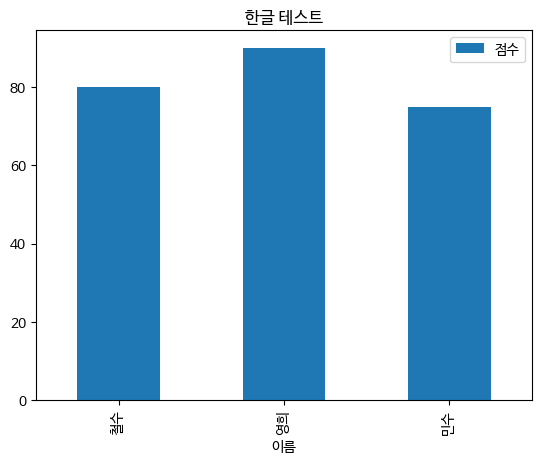

In [3]:
import pandas as pd
import numpy as np

# 테스트 데이터 생성
df_test = pd.DataFrame({
    '이름': ['철수', '영희', '민수'],
    '점수': [80, 90, 75]
})

# 그래프 그리기
df_test.plot(x='이름', y='점수', kind='bar')
plt.title('한글 테스트')
plt.show()

In [4]:
# 1. 구글 드라이브 마운트 (내 드라이브의 파일에 접근하기 위함)
from google.colab import drive
drive.mount('/content/drive')

# 2. 필수 라이브러리 임포트
import pandas as pd
import os

# 3. 데이터 경로 설정 (팀원들이 각자 자신의 경로에 맞게 수정해야 하는 부분)
# 예: '/content/drive/MyDrive/프로젝트폴더명/데이터폴더명/'
base_path = '/content/drive/MyDrive/데이터머지/원본데이터_스케일링/GENERAL/원본데이터'

Mounted at /content/drive


In [5]:
train_part2_name = 'Train/GENERAL_카드승인정보_train_2.csv'
train_part1_name = 'Train/GENERAL_카드승인정보_train_1.csv'
test_file_name = 'Test/GENERAL_카드승인정보_test.csv'

In [6]:
import numpy as np

In [7]:
approve_name1 = 'general_승인매출정보_1.csv'
approve_name2 = 'general_승인매출정보_2.csv'

In [8]:
# approve_check = pd.read_csv(os.path.join(base_path, approve_name1))

In [9]:
# approve_check.info()

In [10]:
# del approve_check

### 카드 승인정보 통합 -- 초기에만 돌리고 나중에 돌릴때는 안돌려도 괜찮아요
- train_test 데이터 통합

In [ ]:
import pandas as pd
import os
import gc

# 출력 파일명 (최종 결과물)
output_part1 = os.path.join(base_path, '카드승인정보_FULL_1.csv')
output_part2 = os.path.join(base_path, '카드승인정보_FULL_2.csv')

# --------------------------------------------------------------------------------
# [핵심 함수] 청크 단위 이어쓰기 (RAM 폭발 방지)
# --------------------------------------------------------------------------------
def process_and_append(source_file, target_file, use_cols=None, chunk_size=50000):
    """
    source_file을 조금씩 읽어서 target_file에 이어 붙입니다.
    """
    first_chunk = True

    # 1. 파일이 존재하는지 확인
    if not os.path.exists(source_file):
        print(f"🚫 파일 없음: {source_file}")
        return

    # 2. 청크 단위로 읽기 (한 번에 5만 줄만 RAM에 올림)
    for chunk in pd.read_csv(source_file, encoding='utf-8', chunksize=chunk_size, usecols=use_cols):

        # (선택) 여기서 데이터 타입 줄이기 등 전처리 가능
        # chunk = reduce_mem_usage(chunk)

        # 3. 타겟 파일에 저장 (mode='a': 이어쓰기)
        if first_chunk:
            # 타겟 파일이 아예 처음 생성되는 경우라면 헤더 포함, 아니면 헤더 제외
            header_mode = not os.path.exists(target_file)
            chunk.to_csv(target_file, mode='a', index=False, header=header_mode, encoding='utf-8')
            first_chunk = False
        else:
            chunk.to_csv(target_file, mode='a', index=False, header=False, encoding='utf-8')

        # 4. 메모리 비우기
        del chunk
        gc.collect()

    print(f"  ✅ {os.path.basename(source_file)} -> {os.path.basename(target_file)} 병합 완료")

# ================================================================================
# [실행] Part 1 만들기 (Train 1 + Test의 Part 1 컬럼)
# ================================================================================
print("=== [작업 1] FULL_1 생성 시작 ===")

# 0. 기존 파일 있으면 삭제 (충돌 방지)
if os.path.exists(output_part1):
    os.remove(output_part1)

# 1. Train Part 1 컬럼명 알아내기 (맨 윗줄만 살짝 읽기)
temp_df = pd.read_csv(os.path.join(base_path, train_part1_name), encoding='utf-8', nrows=0)
cols_part1 = temp_df.columns.tolist()
del temp_df

# 2. Train Part 1 전체 이어쓰기
print("  > Train Part 1 처리 중...")
process_and_append(os.path.join(base_path, train_part1_name), output_part1)

# 3. Test 파일에서 Part 1 컬럼만 뽑아서 이어쓰기
print("  > Test (Part 1 컬럼) 처리 중...")
process_and_append(os.path.join(base_path, test_file_name), output_part1, use_cols=cols_part1)


# ================================================================================
# [실행] Part 2 만들기 (Train 2 + Test의 Part 2 컬럼)
# ================================================================================
print("\n=== [작업 2] FULL_2 생성 시작 ===")

if os.path.exists(output_part2):
    os.remove(output_part2)

# 1. Train Part 2 컬럼명 알아내기
temp_df = pd.read_csv(os.path.join(base_path, train_part2_name), encoding='cp949', nrows=0)
cols_part2 = temp_df.columns.tolist()
del temp_df

# 2. Train Part 2 전체 이어쓰기
print("  > Train Part 2 처리 중...")
process_and_append(os.path.join(base_path, train_part2_name), output_part2)

# 3. Test 파일에서 Part 2 컬럼만 뽑아서 이어쓰기
print("  > Test (Part 2 컬럼) 처리 중...")
process_and_append(os.path.join(base_path, test_file_name), output_part2, use_cols=cols_part2)

print("\n=== 모든 작업 완료! 파일이 생성되었는지 확인하세요. ===")

NameError: name 'base_path' is not defined

In [ ]:
base_path

### 타겟에 쓰인 변수 확인
- 저장된 컬럼 중에 이용건수, 이용금액이 누락

In [ ]:
import pandas as pd
import glob
import os

# 원본 데이터가 들어있는 폴더 경로
target_folder_path = base_path

print(f"=== 📂 원본 파일 헤더 전수 조사: {target_folder_path} ===")

csv_files = glob.glob(os.path.join(target_folder_path, "*.csv"))

for file_path in csv_files:
    file_name = os.path.basename(file_path)

    # 제외하고 싶은 파일 (이미 만든 결과물 등)
    if "General_" in file_name or "Target_" in file_name or "Final_" in file_name:
        continue

    try:
        # 헤더만 읽기
        df_head = pd.read_csv(file_path, nrows=0, encoding='utf-8')
        cols = df_head.columns.tolist()
        print(f"\n📄 [파일] {file_name}")
        print(f"   👉 Key 후보: {[c for c in cols if '회원' in c or 'no' in c or 'ID' in c]}")
        print(f"   👉 이용/건수 관련: {[c for c in cols if '이용' in c or 'cnt' in c or 'use' in c]}")
        print(f"   👉 전체 컬럼(앞 5개): {cols[:5]} ...")

    except UnicodeDecodeError:
        print(f"\n📄 [파일] {file_name} (cp949 시도)")
        try:
            df_head = pd.read_csv(file_path, nrows=0, encoding='cp949')
            cols = df_head.columns.tolist()
            print(f"   👉 Key 후보: {[c for c in cols if '회원' in c or 'no' in c or 'ID' in c]}")
            print(f"   👉 이용/건수 관련: {[c for c in cols if '이용' in c or 'cnt' in c or 'use' in c]}")
        except:
            print("   ❌ 읽기 실패 (인코딩 확인 필요)")

=== 📂 원본 파일 헤더 전수 조사: /content/drive/MyDrive/데이터머지/원본데이터_스케일링/GENERAL/원본데이터 ===

📄 [파일] general_카드회원정보.csv
   👉 Key 후보: ['발급회원번호', '회원여부_이용가능', '회원여부_이용가능_CA', '회원여부_이용가능_카드론', '회원여부_연체', '우수회원면제카드수_B0M']
   👉 이용/건수 관련: ['회원여부_이용가능', '회원여부_이용가능_CA', '회원여부_이용가능_카드론', '소지카드수_이용가능_신용', '이용거절여부_카드론', '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크', '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크', '이용카드수_체크_가족', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족', '이용금액_R3M_체크', '이용금액_R3M_체크_가족', '_1순위카드이용금액', '_1순위카드이용건수', '_2순위카드이용금액', '_2순위카드이용건수', '최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인']
   👉 전체 컬럼(앞 5개): ['기준년월', '발급회원번호', '남녀구분코드', '연령', 'VIP등급코드'] ...

📄 [파일] general_카드신용정보.csv
   👉 Key 후보: ['발급회원번호']
   👉 이용/건수 관련: ['카드이용한도금액', '카드이용한도금액_B1M', '카드이용한도금액_B2M']
   👉 전체 컬럼(앞 5개): ['기준년월', '발급회원번호', '최초한도금액', '카드이용한도금액', 'CA한도금액'] ...

📄 [파일] general_

In [ ]:
import pandas as pd
import os


# 2. 점검할 파일과 찾아야 할 목표 컬럼들
check_targets = {
    'general_승인매출정보_1.csv': {
        '필수_Key': ['발급회원번호'], # 이게 없으면 강제 병합 필요
        '필수_Data': ['이용금액_신용_B0M', '이용건수_신용_B0M'] # 이탈 점수 계산용
    },
    'general_승인매출정보_2.csv': {
        '필수_Key': ['발급회원번호'],
        '필수_Data': ['이용금액_연체_B0M', '연체잔액_B0M'] # 연체 관련
    }
}

print("=== 🕵️‍♂️ 승인매출정보 컬럼 누락 정밀 검사 ===")

for filename, targets in check_targets.items():
    file_path = os.path.join(base_path, filename)
    print(f"\n📄 검사 대상: {filename}")

    if not os.path.exists(file_path):
        print("  🚨 [파일 없음] 경로를 확인해주세요.")
        continue

    try:
        # 헤더만 로드 (가볍게)
        df = pd.read_csv(file_path, nrows=0, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, nrows=0, encoding='cp949')

    cols = df.columns.tolist()

    # 1. Key 컬럼 확인
    for key in targets['필수_Key']:
        if key in cols:
            print(f"  ✅ Key 확인: '{key}' 있음 (정상 병합 가능)")
        else:
            print(f"  ⚠️ Key 누락: '{key}' 없음 -> 🚑 강제 병합(순서 기반) 필요!")

    # 2. 데이터 컬럼 확인
    print("  [데이터 컬럼 점검]")
    for data_col in targets['필수_Data']:
        if data_col in cols:
            print(f"    ✅ 있음: {data_col}")
        else:
            # 혹시 공백 문제일 수 있으니 strip 후 재확인
            stripped_cols = [c.strip() for c in cols]
            if data_col in stripped_cols:
                 print(f"    ⚠️ 발견(공백포함): '{data_col}' (컬럼명에 공백이 숨어있습니다)")
            else:
                 print(f"    ❌ 누락됨: '{data_col}' (이 파일에 없습니다)")

    # (참고) 실제 존재하는 컬럼 중 '이용'이나 '연체' 관련 컬럼 3개만 샘플 출력
    related = [c for c in cols if '이용' in c or '연체' in c][:3]
    if related:
        print(f"  (참고: 파일 내 관련 컬럼 예시 -> {related})")

=== 🕵️‍♂️ 승인매출정보 컬럼 누락 정밀 검사 ===

📄 검사 대상: general_승인매출정보_1.csv
  ⚠️ Key 누락: '발급회원번호' 없음 -> 🚑 강제 병합(순서 기반) 필요!
  [데이터 컬럼 점검]
    ✅ 있음: 이용금액_신용_B0M
    ✅ 있음: 이용건수_신용_B0M
  (참고: 파일 내 관련 컬럼 예시 -> ['최종이용일자_기본', '최종이용일자_신판', '최종이용일자_CA'])

📄 검사 대상: general_승인매출정보_2.csv
  ⚠️ Key 누락: '발급회원번호' 없음 -> 🚑 강제 병합(순서 기반) 필요!
  [데이터 컬럼 점검]
    ✅ 있음: 이용금액_연체_B0M
    ❌ 누락됨: '연체잔액_B0M' (이 파일에 없습니다)
  (참고: 파일 내 관련 컬럼 예시 -> ['_3순위교통업종_이용금액', '_1순위여유업종_이용금액', '_2순위여유업종_이용금액'])


In [ ]:
import pandas as pd
import os

input_file_name = '원본데이터/General_Final_Model_Input.parquet'

print(f"=== 🔍 컬럼 정밀 검사 시작: {input_file_name} ===")

try:
    # 1. 파일 헤더만 살짝 읽어오기
    df_check = pd.read_parquet(os.path.join(base_path, input_file_name))

    print(f"✅ 파일 로드 성공! (총 컬럼 수: {len(df_check.columns)})")
    print("-" * 50)

    # 2. '이용'이라는 글자가 들어간 모든 컬럼 찾기 (범인 색출)
    suspects = [col for col in df_check.columns if '이용' in col]

    if suspects:
        print("🎉 [단서 발견] '이용'이 포함된 컬럼들:")
        for col in suspects:
            # 앞뒤에 공백이 있는지 눈으로 확인하기 위해 따옴표로 감싸서 출력
            print(f"   👉 '{col}'")
    else:
        print("🚨 [비상] '이용'과 관련된 컬럼이 아예 없습니다. 추출 단계에서 누락되었습니다.")

    print("-" * 50)
    print("📋 전체 컬럼 목록 (참고용):")
    print(df_check.columns.tolist())

except Exception as e:
    print(f"❌ 파일 읽기 실패: {e}")

=== 🔍 컬럼 정밀 검사 시작: 원본데이터/General_Final_Model_Input.parquet ===
✅ 파일 로드 성공! (총 컬럼 수: 7)
--------------------------------------------------
🚨 [비상] '이용'과 관련된 컬럼이 아예 없습니다. 추출 단계에서 누락되었습니다.
--------------------------------------------------
📋 전체 컬럼 목록 (참고용):
['발급회원번호', '기준년월', '잔액_B0M', '잔액_현금서비스_B0M', '잔액_카드론_B0M', '연체잔액_B0M', '월중평잔']


### 데이터 강제 병합 및 추출
- 현시점 완료
- 실행 x

### 원본에서 컬럼 추출
- 최총 결과값 df
  - 현재 컬럼 목록: ['발급회원번호', 'Slope_Spend', 'Slope_Count', 'Slope_Balance', 'Score_BadDebt', 'Score_Delinq', 'Score_Activity', 'Score_Asset', 'Score_Status_Total', 'Norm_Slope_Spend', 'Norm_Slope_Balance', 'Norm_Slope_Count', 'Score_Slope_Total', 'Final_Total_Score']

In [ ]:
import pandas as pd
import numpy as np
import os
import gc

# =============================================================================
# [설정] 경로 및 파일명 (사용자 환경에 맞게 수정)
# =============================================================================

# 1. Key를 제공할 파일 (회원정보)
file_key = 'general_카드회원정보.csv'

# 2. Key가 없어서 강제 병합할 파일들 (승인매출)
# (파일명: [추출할 컬럼 리스트])
no_key_files = {
    'general_승인매출정보_1.csv': ['이용금액_신용_B0M', '이용건수_신용_B0M'],
    'general_승인매출정보_2.csv': ['이용금액_연체_B0M'] # 나중에 '연체잔액_B0M'으로 이름 변경
}

# 3. Key가 있어서 그냥 읽으면 되는 파일들 (잔액 등)
# (파일명: [추출할 컬럼 리스트])
# ※ 주의: '연체잔액_B0M'이 잔액정보에 있다면 여기서 가져오고, 없다면 위에서 만든걸 씁니다.
with_key_files = {
    'general_카드잔액정보.csv': [
        '발급회원번호', '기준년월',
        '잔액_B0M', '잔액_현금서비스_B0M', '잔액_카드론_B0M', '월중평잔'
    ]
    # 필요시 다른 파일 추가
}

# 최종 저장 파일명
final_output_name = 'General_Final_Model_Input.parquet'

# =============================================================================
# [실행] 통합 복구 프로세스
# =============================================================================
print("=== 🚑 데이터 긴급 복구 및 병합 시작 ===")

# 1. Key 데이터 로드 (회원정보)
print(f"  > Key 로드 중: {file_key}")
try:
    df_keys = pd.read_csv(os.path.join(base_path, file_key), usecols=['발급회원번호', '기준년월'], encoding='utf-8')
except UnicodeDecodeError:
    df_keys = pd.read_csv(os.path.join(base_path, file_key), usecols=['발급회원번호', '기준년월'], encoding='cp949')

print(f"    - Key 확보 완료: {len(df_keys)}행")

# 최종 병합을 위한 리스트 (Key 프레임 포함)
dfs_to_merge = [df_keys]

# -----------------------------------------------------------------------------
# 2. Key 없는 파일 처리 (강제 병합)
# -----------------------------------------------------------------------------
for fname, target_cols in no_key_files.items():
    fpath = os.path.join(base_path, fname)
    if not os.path.exists(fpath):
        print(f"  ⚠️ 파일 없음: {fname} (Skip)")
        continue

    print(f"  > [강제 병합] {fname} 읽는 중...")
    try:
        # 컬럼 존재 여부 확인 후 로드
        try:
            df_temp = pd.read_csv(fpath, usecols=target_cols, encoding='utf-8')
        except ValueError: # 컬럼 이름이 틀렸거나 없을 때
             header = pd.read_csv(fpath, nrows=0, encoding='utf-8').columns
             valid_cols = [c for c in target_cols if c in header]
             print(f"    ! 요청 컬럼 중 일부 부재. 가능한 것만 로드: {valid_cols}")
             df_temp = pd.read_csv(fpath, usecols=valid_cols, encoding='utf-8')
        except UnicodeDecodeError:
            df_temp = pd.read_csv(fpath, usecols=target_cols, encoding='cp949')

        # 행 개수 일치 확인 (중요)
        if len(df_temp) == len(df_keys):
            # 병합 리스트에 추가 (concat axis=1 효과를 위해 나중에 합침)
            dfs_to_merge.append(df_temp)
            print(f"    - 성공: {len(df_temp)}행 데이터 확보")
        else:
            print(f"    🚨 [치명적 오류] 행 개수 불일치! (Key: {len(df_keys)} vs File: {len(df_temp)}) -> 병합 제외")

    except Exception as e:
        print(f"    ❌ 처리 실패: {e}")

# -----------------------------------------------------------------------------
# 3. Key 있는 파일 처리 (일반 병합)
# -----------------------------------------------------------------------------
# 3-1. Key 없는 애들 먼저 합체 (Main DataFrame 생성)
print("  > 1차 결합 (Key + 승인매출)...")
df_main = pd.concat(dfs_to_merge, axis=1)

# 중복된 컬럼 제거
df_main = df_main.loc[:, ~df_main.columns.duplicated()]
print(f"    - 1차 결합 완료: {df_main.shape}")

del dfs_to_merge, df_keys
gc.collect()

# 3-2. Key 있는 파일들과 Merge
for fname, target_cols in with_key_files.items():
    fpath = os.path.join(base_path, fname)
    print(f"  > [Key 병합] {fname} 처리 중...")

    try:
        # 로드
        try:
            df_sub = pd.read_csv(fpath, usecols=target_cols, encoding='utf-8')
        except ValueError:
            header = pd.read_csv(fpath, nrows=0, encoding='utf-8').columns
            valid_cols = [c for c in target_cols if c in header]
            # Key는 필수
            if '발급회원번호' not in valid_cols: valid_cols.append('발급회원번호')
            if '기준년월' not in valid_cols: valid_cols.append('기준년월')
            df_sub = pd.read_csv(fpath, usecols=valid_cols, encoding='utf-8')
        except UnicodeDecodeError:
            df_sub = pd.read_csv(fpath, usecols=target_cols, encoding='cp949')

        # 기준년월 형식이 다를 수 있으니 통일 (숫자형)
        df_main['기준년월'] = pd.to_numeric(df_main['기준년월'], errors='coerce')
        df_sub['기준년월'] = pd.to_numeric(df_sub['기준년월'], errors='coerce')

        df_main = pd.merge(df_main, df_sub, on=['발급회원번호', '기준년월'], how='left')
        print(f"    - 병합 완료. 현재 크기: {df_main.shape}")

        del df_sub
        gc.collect()

    except Exception as e:
        print(f"    ❌ 처리 실패 ({fname}): {e}")

# -----------------------------------------------------------------------------
# 4. 컬럼명 정리 및 저장
# -----------------------------------------------------------------------------
# 연체잔액 컬럼명 통일 (승인매출2에서 가져온 경우 이름이 다를 수 있음)
if '연체잔액_B0M' not in df_main.columns and '이용금액_연체_B0M' in df_main.columns:
    print("  > 알림: '이용금액_연체_B0M'을 '연체잔액_B0M'으로 변경합니다.")
    df_main.rename(columns={'이용금액_연체_B0M': '연체잔액_B0M'}, inplace=True)

print("  > 최종 파일 저장 중 (Parquet)...")
save_path = os.path.join(base_path, final_output_name)
df_main.to_parquet(save_path, index=False)

print(f"\n🎉 [성공] 모든 데이터가 복구되어 하나로 합쳐졌습니다!")
print(f"👉 저장 경로: {save_path}")
print(f"👉 데이터 크기: {df_main.shape}")
print(f"👉 포함된 컬럼: {df_main.columns.tolist()}")

=== 🚑 데이터 긴급 복구 및 병합 시작 ===
  > Key 로드 중: general_카드회원정보.csv


In [ ]:
import pandas as pd
import numpy as np
import cupy as cp  # GPU 가속 라이브러리 (Colab GPU 런타임 필요)
import os
import gc

# =============================================================================
# [설정]
# =============================================================================
input_file_name = 'General_Final_Model_Input.parquet'

COL_ID = '발급회원번호'
COL_DATE = '기준년월'

# 분석할 변수 리스트
features = {
    '이용금액_신용_B0M': 'Slope_Spend',
    '이용건수_신용_B0M': 'Slope_Count',
    '잔액_B0M': 'Slope_Balance',
    '월중평잔': 'Score_Asset',         # 자산 점수용
    '잔액_현금서비스_B0M': 'Score_BadDebt_1', # 악성부채1
    '잔액_카드론_B0M': 'Score_BadDebt_2',     # 악성부채2
    '연체잔액_B0M': 'Score_Delinq',           # 연체 점수용
}

# =============================================================================
# [함수] GPU 기반 기울기(Slope) 계산 - 초고속
# =============================================================================
def calculate_slope_gpu(df_wide):
    """
    CuPy(GPU)를 사용하여 수십만 명의 기울기를 행렬 연산으로 한 번에 계산
    """
    # 1. 데이터를 GPU 메모리로 이동 (NaN은 0으로 처리)
    matrix = cp.asarray(df_wide.fillna(0).values)
    n_samples, n_points = matrix.shape

    # 2. X축 (0, 1, 2, ... 5) 생성
    x = cp.arange(n_points)
    x_mean = cp.mean(x)
    y_mean = cp.mean(matrix, axis=1, keepdims=True)

    # 3. 기울기 공식: sum((x - x_mean) * (y - y_mean)) / sum((x - x_mean)^2)
    numerator = cp.sum((x - x_mean) * (matrix - y_mean), axis=1)
    denominator = cp.sum((x - x_mean) ** 2)

    slope = numerator / denominator

    # 4. 결과를 다시 CPU(Numpy)로 가져오기
    return cp.asnumpy(slope)

# =============================================================================
# [실행]
# =============================================================================
print("=== 🚀 GPU 가속 이탈 점수 산출 시작 ===")

# 1. 데이터 로드
full_path = os.path.join(base_path, input_file_name)
df = pd.read_parquet(full_path)

# 기준년월 숫자 변환 및 정렬
df[COL_DATE] = pd.to_numeric(df[COL_DATE], errors='coerce')
df = df.sort_values(by=[COL_ID, COL_DATE])

# 2. Wide 포맷으로 변환 (Pivoting) - 핵심 최적화 단계
print("  > 데이터를 행렬(Wide) 형태로 변환 중...")

# 결과 저장할 DataFrame (인덱스: 발급회원번호)
result = pd.DataFrame(index=df[COL_ID].unique())

# (1) 기울기 계산 (3종)
slope_targets = ['이용금액_신용_B0M', '이용건수_신용_B0M', '잔액_B0M']
for col in slope_targets:
    print(f"    - '{col}' 기울기 계산 중 (GPU)...")
    # Pivot: 행(ID), 열(날짜), 값(Col)
    df_pivot = df.pivot(index=COL_ID, columns=COL_DATE, values=col)

    # 최근 6개월 데이터만 사용 (컬럼이 6개 이상이면 뒤에서 6개 자름)
    if df_pivot.shape[1] > 6:
        df_pivot = df_pivot.iloc[:, -6:]

    # GPU 계산
    slope_name = features[col]
    result[slope_name] = calculate_slope_gpu(df_pivot)

    # 메모리 정리
    del df_pivot
    gc.collect()

# (2) 상태 점수 계산 (벡터화 - CPU로도 충분히 빠름)
print("  > 상태 점수(Status Score) 계산 중 (Vectorized)...")

# 필요한 데이터 Pivot (전체 데이터에 대해 한 번 더 정리)
# 메모리 절약을 위해 필요한 컬럼만 그때그때 처리
def get_pivot(col):
    p = df.pivot(index=COL_ID, columns=COL_DATE, values=col)
    return p.fillna(0) # 결측치는 0으로

# 2-1. 악성부채 점수
# 현금서비스: (당월 - 전월) / (전월 + 1) * 1.5
p_cash = get_pivot('잔액_현금서비스_B0M')
p_loan = get_pivot('잔액_카드론_B0M')

# iloc[:, -1]은 가장 최근 달, -2는 그 전달
bad_debt = (
    ((p_cash.iloc[:, -1] - p_cash.iloc[:, -2]) / (p_cash.iloc[:, -2] + 1) * 1.5) +
    ((p_loan.iloc[:, -1] - p_loan.iloc[:, -2]) / (p_loan.iloc[:, -2] + 1) * 1.0)
)
result['Score_BadDebt'] = bad_debt

# 2-2. 연체 점수 (가중치: 최근 3 > 2 > 1)
p_delinq = get_pivot('연체잔액_B0M')
delinq_score = (
    (p_delinq.iloc[:, -1] * 3.0) +
    (p_delinq.iloc[:, -2] * 2.0) +
    (p_delinq.iloc[:, -3] * 1.0)
)
result['Score_Delinq'] = delinq_score

# 2-3. 활동성 점수 (최근 3개월 합 * 2 - 전체 6개월 합)
p_count = get_pivot('이용건수_신용_B0M')
sum_r3 = p_count.iloc[:, -3:].sum(axis=1)
sum_r6 = p_count.iloc[:, -6:].sum(axis=1)
result['Score_Activity'] = ((sum_r3 * 2) - sum_r6) / (sum_r6 + 1) * 100

# 2-4. 자산 점수 (최근 3개월 평균 / 전체 6개월 평균)
p_asset = get_pivot('월중평잔')
avg_r3 = p_asset.iloc[:, -3:].mean(axis=1)
avg_r6 = p_asset.iloc[:, -6:].mean(axis=1)
result['Score_Asset'] = (avg_r3 / (avg_r6 + 1)) * 10

# 3. 종합 점수 산출
print("  > 최종 점수 합산 중...")
result['Score_Status_Total'] = (result['Score_BadDebt'] + result['Score_Delinq']) - (result['Score_Activity'] + result['Score_Asset'])

# 정규화 및 최종 계산 (이전과 동일 로직)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 기울기 정규화 (음수일수록 위험 -> 양수로 변환)
for col in ['Slope_Spend', 'Slope_Balance', 'Slope_Count']:
    vals = result[col].values
    # 음수만 취해서 절대값으로 (감소폭 클수록 큰 점수)
    risk = np.where(vals < 0, -vals, 0)
    result[f'Norm_{col}'] = scaler.fit_transform(risk.reshape(-1, 1)).flatten()

# 기울기 종합 점수
result['Score_Slope_Total'] = (
    (result['Norm_Slope_Spend'] * 40) +
    (result['Norm_Slope_Balance'] * 30) +
    (result['Norm_Slope_Count'] * 30)
)

# 최종 점수
result['Score_Status_Total'] = result['Score_Status_Total'].fillna(0)
result['Final_Total_Score'] = (result['Score_Status_Total'] + result['Score_Slope_Total']) * 0.5

# # 저장
# save_path = os.path.join(base_path, 'Final_Churn_Scores_GPU.csv')
# result.reset_index().to_csv(save_path, index=False, encoding='utf-8')

# print(f"\n🎉 [완료] GPU 가속 처리 완료! 저장됨: {save_path}")
print(result[['Final_Total_Score', 'Score_Slope_Total', 'Score_Status_Total']].head())

=== 🚀 GPU 가속 이탈 점수 산출 시작 ===
  > 데이터를 행렬(Wide) 형태로 변환 중...
    - '이용금액_신용_B0M' 기울기 계산 중 (GPU)...
    - '이용건수_신용_B0M' 기울기 계산 중 (GPU)...
    - '잔액_B0M' 기울기 계산 중 (GPU)...
  > 상태 점수(Status Score) 계산 중 (Vectorized)...
  > 최종 점수 합산 중...
            Final_Total_Score  Score_Slope_Total  Score_Status_Total
SYN_1               -4.282071           1.289200           -9.853342
SYN_10              -3.787358           1.530716           -9.105433
SYN_100             -4.258659           0.000000           -8.517318
SYN_10000           -6.935263           0.252607          -14.123132
SYN_100000         -15.443425           0.000000          -30.886849


In [ ]:
result

,Slope_Spend,Slope_Count,Slope_Balance,Score_BadDebt,Score_Delinq,Score_Activity,Score_Asset,Score_Status_Total,Norm_Slope_Spend,Norm_Slope_Balance,Norm_Slope_Count,Score_Slope_Total,Final_Total_Score
SYN_1,-3331.485714,-0.085714,-25326.971429,0.000000,0.0,1.470588,8.382753,-9.853342,0.010864,0.008354,0.020134,1.289200,-4.282071
SYN_10,-2538.514286,-0.057143,-80534.057143,-0.003547,0.0,0.000000,9.101886,-9.105433,0.008278,0.026564,0.013423,1.530716,-3.787358
SYN_100,1707.714286,0.028571,944.571429,0.000000,0.0,-3.125000,11.642318,-8.517318,0.000000,0.000000,0.000000,0.000000,-4.258659
SYN_10000,10811.714286,0.400000,-25527.885714,0.000000,0.0,5.128205,8.994927,-14.123132,0.000000,0.008420,0.000000,0.252607,-6.935263
SYN_100000,49049.742857,0.942857,157482.314286,0.759907,0.0,19.565217,12.081539,-30.886849,0.000000,0.000000,0.000000,0.000000,-15.443425
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYN_999995,1572.971429,0.085714,-17811.685714,0.000000,0.0,13.636364,10.119346,-23.755709,0.000000,0.005875,0.000000,0.176252,-11.789728
SYN_999996,-40198.885714,-0.057143,-9155.514286,0.000000,0.0,-66.666667,9.733939,56.932728,0.131087,0.003020,0.013423,5.736773,31.334751
SYN_999997,11652.628571,0.285714,-16725.228571,0.000000,0.0,13.953488,10.823185,-24.776674,0.000000,0.005517,0.000000,0.165502,-12.305586
SYN_999998,0.000000,-0.228571,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.053691,1.610738,0.805369


In [ ]:
# 1. 인덱스(Row Name)에 숨어있는 발급회원번호를 정식 컬럼으로 변환
result = result.reset_index()

# 2. 확인
print("=== 컬럼 변환 완료 ===")
print(f"📌 이제 '발급회원번호'가 컬럼 리스트에 보입니다: {result.columns.tolist()}")

# 3. 데이터 미리보기 (가장 왼쪽 컬럼 확인)
display(result.head())

=== 컬럼 변환 완료 ===
📌 이제 '발급회원번호'가 컬럼 리스트에 보입니다: ['index', 'Slope_Spend', 'Slope_Count', 'Slope_Balance', 'Score_BadDebt', 'Score_Delinq', 'Score_Activity', 'Score_Asset', 'Score_Status_Total', 'Norm_Slope_Spend', 'Norm_Slope_Balance', 'Norm_Slope_Count', 'Score_Slope_Total', 'Final_Total_Score']


,index,Slope_Spend,Slope_Count,Slope_Balance,Score_BadDebt,Score_Delinq,Score_Activity,Score_Asset,Score_Status_Total,Norm_Slope_Spend,Norm_Slope_Balance,Norm_Slope_Count,Score_Slope_Total,Final_Total_Score
0,SYN_1,-3331.485714,-0.085714,-25326.971429,0.000000,0.0,1.470588,8.382753,-9.853342,0.010864,0.008354,0.020134,1.289200,-4.282071
1,SYN_10,-2538.514286,-0.057143,-80534.057143,-0.003547,0.0,0.000000,9.101886,-9.105433,0.008278,0.026564,0.013423,1.530716,-3.787358
2,SYN_100,1707.714286,0.028571,944.571429,0.000000,0.0,-3.125000,11.642318,-8.517318,0.000000,0.000000,0.000000,0.000000,-4.258659
3,SYN_10000,10811.714286,0.400000,-25527.885714,0.000000,0.0,5.128205,8.994927,-14.123132,0.000000,0.008420,0.000000,0.252607,-6.935263
4,SYN_100000,49049.742857,0.942857,157482.314286,0.759907,0.0,19.565217,12.081539,-30.886849,0.000000,0.000000,0.000000,0.000000,-15.443425


In [ ]:
# 1. 인덱스를 컬럼으로 변환 (이미 하셨다면 이 줄은 생략 가능)
# result = result.reset_index()

# 2. 컬럼 이름 변경
# 'index'라는 컬럼이 있으면 '발급회원번호'로 바꿉니다.
result.rename(columns={'index': '발급회원번호'}, inplace=True)

# 3. 만약 'level_0' 같은 다른 이름으로 되어 있을 경우를 대비해 안전하게 인덱스 이름 지정 후 리셋하는 방법
# (위 코드로 안 될 경우에만 사용하세요)
# result.index.name = '발급회원번호'
# result = result.reset_index()

print("=== ✅ 컬럼명 변경 완료 ===")
print(f"현재 컬럼 목록: {result.columns.tolist()}")

# 4. 데이터 확인
display(result.head())

=== ✅ 컬럼명 변경 완료 ===
현재 컬럼 목록: ['발급회원번호', 'Slope_Spend', 'Slope_Count', 'Slope_Balance', 'Score_BadDebt', 'Score_Delinq', 'Score_Activity', 'Score_Asset', 'Score_Status_Total', 'Norm_Slope_Spend', 'Norm_Slope_Balance', 'Norm_Slope_Count', 'Score_Slope_Total', 'Final_Total_Score']


,발급회원번호,Slope_Spend,Slope_Count,Slope_Balance,Score_BadDebt,Score_Delinq,Score_Activity,Score_Asset,Score_Status_Total,Norm_Slope_Spend,Norm_Slope_Balance,Norm_Slope_Count,Score_Slope_Total,Final_Total_Score
0,SYN_1,-3331.485714,-0.085714,-25326.971429,0.000000,0.0,1.470588,8.382753,-9.853342,0.010864,0.008354,0.020134,1.289200,-4.282071
1,SYN_10,-2538.514286,-0.057143,-80534.057143,-0.003547,0.0,0.000000,9.101886,-9.105433,0.008278,0.026564,0.013423,1.530716,-3.787358
2,SYN_100,1707.714286,0.028571,944.571429,0.000000,0.0,-3.125000,11.642318,-8.517318,0.000000,0.000000,0.000000,0.000000,-4.258659
3,SYN_10000,10811.714286,0.400000,-25527.885714,0.000000,0.0,5.128205,8.994927,-14.123132,0.000000,0.008420,0.000000,0.252607,-6.935263
4,SYN_100000,49049.742857,0.942857,157482.314286,0.759907,0.0,19.565217,12.081539,-30.886849,0.000000,0.000000,0.000000,0.000000,-15.443425


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2402408 entries, 0 to 2402407
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   발급회원번호              object 
 1   Slope_Spend         float64
 2   Slope_Count         float64
 3   Slope_Balance       float64
 4   Score_BadDebt       float64
 5   Score_Delinq        float64
 6   Score_Activity      float64
 7   Score_Asset         float64
 8   Score_Status_Total  float64
 9   Norm_Slope_Spend    float64
 10  Norm_Slope_Balance  float64
 11  Norm_Slope_Count    float64
 12  Score_Slope_Total   float64
 13  Final_Total_Score   float64
dtypes: float64(13), object(1)
memory usage: 256.6+ MB


In [ ]:
# # 타깃과 파생변수가 있는 데이터를 csv파일로 저장

# # ---------------------------------------------------------------------------
# # [설정] 저장하고 싶은 경로와 파일명
# # ---------------------------------------------------------------------------
# 주의: '/content/drive/MyDrive/' 까지는 고정이고, 그 뒤가 내 폴더 경로입니다.
# file_name = 'General_원본_4kind2진분류_타겟파생.csv'

# # 전체 경로 만들기
# full_path = os.path.join(base_path, file_name)

# # 3. CSV로 저장
# # index=False: 불필요한 인덱스 숫자(0, 1, 2...) 저장 안 함
# # encoding='utf-8-sig': 엑셀에서 한글 깨짐 방지 (필수!)
# df.to_csv(full_path, index=False, encoding='utf-8-sig')

# print(f"🎉 저장 완료! 경로를 확인하세요:\n👉 {full_path}")

In [ ]:
df = result
del result

## 기울기 계산


In [ ]:
# =============================================================================
# [Step 6] 기울기 감소/유지(<=0) 비율 확인
# =============================================================================

total_count = len(df)
print(f"📊 전체 데이터 수: {total_count:,}건\n")

# 1. 소비(Spend) 기울기 0 이하 비율
cnt_spend_le0 = len(df[df['Slope_Spend'] <= 0])
ratio_spend = (cnt_spend_le0 / total_count) * 100
print(f"1. 소비 감소/유지 (Spend <= 0): {ratio_spend:.2f}% ({cnt_spend_le0:,}건)")

# 2. 잔액(Balance) 기울기 0 이하 비율
cnt_balance_le0 = len(df[df['Slope_Balance'] <= 0])
ratio_balance = (cnt_balance_le0 / total_count) * 100
print(f"2. 잔액 감소/유지 (Balance <= 0): {ratio_balance:.2f}% ({cnt_balance_le0:,}건)")

# 3. 빈도(Count) 기울기 0 이하 비율
cnt_count_le0 = len(df[df['Slope_Count'] <= 0])
ratio_count = (cnt_count_le0 / total_count) * 100
print(f"3. 빈도 감소/유지 (Count <= 0) : {ratio_count:.2f}% ({cnt_count_le0:,}건)")

print("-" * 50)

# 4. [핵심] 3가지 지표 모두 0 이하인 경우 (교집합)
# 이들은 소비도 줄고, 잔액도 줄고, 발길(빈도)도 끊고 있는 '완전 이탈 징후' 고객군입니다.
df_all_le0 = df[
    (df['Slope_Spend'] <= 0) &
    (df['Slope_Balance'] <= 0) &
    (df['Slope_Count'] <= 0)
]
cnt_all_le0 = len(df_all_le0)
ratio_all = (cnt_all_le0 / total_count) * 100

print(f"🚨 4. 3가지 모두 감소/유지 (All <= 0): {ratio_all:.2f}% ({cnt_all_le0:,}건)")

📊 전체 데이터 수: 2,402,408건

1. 소비 감소/유지 (Spend <= 0): 64.62% (1,552,375건)
2. 잔액 감소/유지 (Balance <= 0): 75.17% (1,805,899건)
3. 빈도 감소/유지 (Count <= 0) : 53.59% (1,287,537건)
--------------------------------------------------
🚨 4. 3가지 모두 감소/유지 (All <= 0): 29.49% (708,530건)


### 상태이상점수
- 4 종류를 2진분류를 통해 분류

In [ ]:
# =============================================================================
# [Step A] 활동성 점수(Score_Activity) 분포 및 분위수 진단
# =============================================================================

# 1. 분위수(Quantile) 통계량 계산
# 하위 10%부터 50%까지 10% 단위로 끊어서 점수 확인
pct_range = [0.1, 0.2, 0.3, 0.4, 0.5]
quantiles_all = df['Score_Activity'].quantile(pct_range)

print("\n[전체 데이터 기준 하위 % 점수]")
for q, val in zip(pct_range, quantiles_all):
    print(f" - 하위 {int(q*100)}%: {val:.2f} 점")

# 감소한 사람(음수)들 중에서만 다시 분위수 확인 (더 정밀한 타겟팅용)
df_neg = df[df['Score_Activity'] < 0]
if not df_neg.empty:
    quantiles_neg = df_neg['Score_Activity'].quantile(pct_range)
    print("\n[활동성 감소(음수) 집단 내 하위 % 점수]")
    for q, val in zip(pct_range, quantiles_neg):
        print(f" - 하위 {int(q*100)}%: {val:.2f} 점")
else:
    quantiles_neg = []
    print("\n⚠️ 활동성 점수가 음수인 데이터가 없습니다.")

# #---------------------------------------------------------
# # 2. 시각화 (Visualization)
# # ---------------------------------------------------------
# sns.set(style="whitegrid")
# fig, axes = plt.subplots(2, 1, figsize=(12, 14))
# plt.subplots_adjust(hspace=0.4)

# # (1) 전체 분포 확인
# sns.histplot(data=df, x='Score_Activity', kde=True, ax=axes[0], color='royalblue', bins=50)
# axes[0].set_title('1. Distribution of Activity Score (All Customers)', fontsize=15, fontweight='bold')
# axes[0].set_xlabel('Score', fontsize=12)

# # 전체 기준 분위수 라인 표시
# for q, val in zip(pct_range, quantiles_all):
#     axes[0].axvline(val, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
#     axes[0].text(val, axes[0].get_ylim()[1]*0.95, f'{int(q*100)}%', color='red', ha='right', fontweight='bold', rotation=90)


# # (2) 감소 집단(음수) 상세 분포 확인 (Zoom-In)
# if not df_neg.empty:
#     sns.histplot(data=df_neg, x='Score_Activity', kde=True, ax=axes[1], color='darkorange', bins=30)
#     axes[1].set_title('2. Distribution of Activity Drop (Negative Score Only)', fontsize=15, fontweight='bold')
#     axes[1].set_xlabel('Negative Score (Drop Intensity)', fontsize=12)

#     # 음수 집단 기준 분위수 라인 표시
#     for q, val in zip(pct_range, quantiles_neg):
#         axes[1].axvline(val, color='darkred', linestyle='--', linewidth=1.5, alpha=0.7)
#         axes[1].text(val, axes[1].get_ylim()[1]*0.95, f'Bottom {int(q*100)}%', color='darkred', ha='right', fontweight='bold', rotation=90)

#     # 통계 박스 추가
#     stats_txt = f'Count: {len(df_neg):,}\nMean: {df_neg["Score_Activity"].mean():.2f}\nMin: {df_neg["Score_Activity"].min():.2f}'
#     axes[1].text(0.02, 0.95, stats_txt, transform=axes[1].transAxes, fontsize=12,
#                  verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# else:
#     axes[1].text(0.5, 0.5, "No Negative Score Data", ha='center', fontsize=15)

# # 저장 및 출력
# # plt.savefig('Activity_Score_Quantile_Analysis.png', dpi=300)
# plt.show()

# print("📊 그래프가 생성되었습니다. 붉은 점선이 하위 % 지점입니다.")


[전체 데이터 기준 하위 % 점수]
 - 하위 10%: -50.00 점
 - 하위 20%: -18.18 점
 - 하위 30%: -7.81 점
 - 하위 40%: -2.82 점
 - 하위 50%: -0.00 점

[활동성 감소(음수) 집단 내 하위 % 점수]
 - 하위 10%: -133.33 점
 - 하위 20%: -54.55 점
 - 하위 30%: -30.77 점
 - 하위 40%: -20.51 점
 - 하위 50%: -12.77 점


#### 상태이상 점수 분포 확인

In [ ]:
# (안전장치) df_all_le0가 정의되어 있는지 확인
# if 'df_all_le0' not in locals():
#     print("⚠️ df_all_le0 데이터를 다시 생성합니다.")
#     df_all_le0 = df[
#         (df['Slope_Spend'] <= 0) &
#         (df['Slope_Balance'] <= 0) &
#         (df['Slope_Count'] <= 0)
#     ].copy()

# print(f"대상 데이터 수: {len(df_all_le0):,}명")
# print("-" * 50)

# =============================================================================
# [Step 1] 조건 Flag 생성 (True = Risk/Signal 로 통일)
# =============================================================================

# 1. [반전] 악성 부채 점수가 있는가? (0이 아니면 True)
# -> 부채가 급증했거나(양수), 급감(음수)하는 등 변동이 있는 상태
df_all_le0['Cond1_Has_BadDebt'] = df_all_le0['Score_BadDebt'] > 0

# 2. [반전] 연체 점수가 있는가? (0이 아니면 True)
# -> 연체가 조금이라도 있는 상태
df_all_le0['Cond2_Has_Delinq'] = df_all_le0['Score_Delinq'] > 0

# 3. [유지] 활동성이 감소했는가? (음수면 True)
df_all_le0['Cond3_Activity_Drop'] = df_all_le0['Score_Activity'] < 0

# 4. [유지] 자산 점수가 0인가? (0이면 True)
df_all_le0['Cond4_Asset_Zero'] = df_all_le0['Score_Asset'] == 0


# =============================================================================
# [Step 2] 고객 유형 세분화 (Segmentation)
# =============================================================================

def classify_churn_type_v2(row):
    # 논리가 'True = 위험'으로 바뀌었으므로 코드가 더 직관적으로 변함

    # 1순위: 부실/연체 위험군 (악성부채나 연체 점수가 '있으면' 해당)
    if row['Cond1_Has_BadDebt'] or row['Cond2_Has_Delinq']:
        return '1. 부실/연체 위험군 (Risk)'

    # 2순위: 이탈 완료 의심군 (자산 점수가 0이면 해당)
    if row['Cond4_Asset_Zero']:
        return '2. 이탈 완료 의심군 (Empty Asset)'

    # 3순위: 활동성 급감군 (활동성 점수가 음수이면 해당)
    if row['Cond3_Activity_Drop']:
        return '3. 활동성 급감군 (Activity Drop)'

    # 4순위: 그 외 (기울기는 줄었지만, 위 3가지 심각한 징후는 없는 경우)
    return '4. 단순 감소/유지군 (Soft Decline)'

# 분류 적용
df_all_le0['Churn_Segment'] = df_all_le0.apply(classify_churn_type_v2, axis=1)

# =============================================================================
# [Step 3] 결과 집계
# =============================================================================

# 1. 각 Risk 조건별 감지 인원 (True 개수)
print("\n[Risk 요인별 감지 인원 (True 기준)]")
print(f"1. 악성부채 징후 (Score!=0) : {df_all_le0['Cond1_Has_BadDebt'].sum():,}명")
print(f"2. 연체 징후 (Score!=0)     : {df_all_le0['Cond2_Has_Delinq'].sum():,}명")
print(f"3. 활동성 감소 (Score<0)    : {df_all_le0['Cond3_Activity_Drop'].sum():,}명")
print(f"4. 자산 이탈 (Score=0)      : {df_all_le0['Cond4_Asset_Zero'].sum():,}명")

# 2. 최종 세그먼트 분포
segment_counts = df_all_le0['Churn_Segment'].value_counts()
segment_ratio = df_all_le0['Churn_Segment'].value_counts(normalize=True) * 100

print("\n[최종 고객 유형 분류 결과]")
result_df = pd.DataFrame({'인원수': segment_counts, '비율(%)': segment_ratio})
# 인덱스 정렬 (1번 그룹부터 순서대로 보이게)
result_df = result_df.sort_index()
print(result_df)

# 샘플 데이터 확인
print("\n[데이터 샘플]")
cols_check = ['발급회원번호', 'Cond1_Has_BadDebt', 'Cond2_Has_Delinq', 'Cond3_Activity_Drop', 'Cond4_Asset_Zero', 'Churn_Segment']
print(df_all_le0[cols_check].head())

/tmp/ipython-input-2001212629.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_le0['Cond1_Has_BadDebt'] = df_all_le0['Score_BadDebt'] > 0
/tmp/ipython-input-2001212629.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_le0['Cond2_Has_Delinq'] = df_all_le0['Score_Delinq'] > 0
/tmp/ipython-input-2001212629.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen


[Risk 요인별 감지 인원 (True 기준)]
1. 악성부채 징후 (Score!=0) : 15,682명
2. 연체 징후 (Score!=0)     : 14,687명
3. 활동성 감소 (Score<0)    : 407,963명
4. 자산 이탈 (Score=0)      : 300,175명

[최종 고객 유형 분류 결과]
                                인원수      비율(%)
Churn_Segment                                 
1. 부실/연체 위험군 (Risk)           28670   4.046406
2. 이탈 완료 의심군 (Empty Asset)   300048  42.347960
3. 활동성 급감군 (Activity Drop)   280050  39.525496
4. 단순 감소/유지군 (Soft Decline)   99762  14.080138

[데이터 샘플]
         발급회원번호  Cond1_Has_BadDebt  Cond2_Has_Delinq  Cond3_Activity_Drop  \
0         SYN_1              False             False                False   
1        SYN_10              False             False                False   
5   SYN_1000001              False             False                 True   
14  SYN_1000010              False             False                False   
16  SYN_1000012              False             False                 True   

    Cond4_Asset_Zero                Churn_Segment  
0           

/tmp/ipython-input-2001212629.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_le0['Churn_Segment'] = df_all_le0.apply(classify_churn_type_v2, axis=1)


In [ ]:
# =============================================================================
# [Step 4] 위험 요인 개수 산출 (Risk Intensity Scoring)
# =============================================================================

# 4가지 조건 컬럼 리스트
risk_cols = ['Cond1_Has_BadDebt', 'Cond2_Has_Delinq', 'Cond3_Activity_Drop', 'Cond4_Asset_Zero']

# 행(Row)별로 True(1)의 개수를 합산
df_all_le0['Risk_Count'] = df_all_le0[risk_cols].sum(axis=1)

# 결과 확인
print("\n[위험 요인 개수별 인원 분포]")
count_dist = df_all_le0['Risk_Count'].value_counts().sort_index()
print(count_dist)

print("\n[비율(%)]")
print((df_all_le0['Risk_Count'].value_counts(normalize=True).sort_index() * 100).round(2))

# 샘플 데이터 확인 (잘 들어갔는지)
print("\n[데이터 샘플]")
print(df_all_le0[['발급회원번호', 'Risk_Count', 'Churn_Segment']].head())


[위험 요인 개수별 인원 분포]
Risk_Count
0     99762
1    480386
2    127025
3      1357
Name: count, dtype: int64

[비율(%)]
Risk_Count
0    14.08
1    67.80
2    17.93
3     0.19
Name: proportion, dtype: float64

[데이터 샘플]
         발급회원번호  Risk_Count                Churn_Segment
0         SYN_1           0  4. 단순 감소/유지군 (Soft Decline)
1        SYN_10           0  4. 단순 감소/유지군 (Soft Decline)
5   SYN_1000001           1   3. 활동성 급감군 (Activity Drop)
14  SYN_1000010           1   2. 이탈 완료 의심군 (Empty Asset)
16  SYN_1000012           1   3. 활동성 급감군 (Activity Drop)


/tmp/ipython-input-1207309625.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_le0['Risk_Count'] = df_all_le0[risk_cols].sum(axis=1)


### 상태이상 점수 기반 이진분류 (4kind)

In [ ]:
# (안전장치) df_all_le0가 정의되어 있는지 확인
# if 'df_all_le0' not in locals():
#     print("⚠️ df_all_le0 데이터를 다시 생성합니다.")
#     df_all_le0 = df[
#         (df['Slope_Spend'] <= 0) &
#         (df['Slope_Balance'] <= 0) &
#         (df['Slope_Count'] <= 0)
#     ].copy()

# print(f"대상 데이터 수: {len(df_all_le0):,}명")
# print("-" * 50)

# =============================================================================
# [Step 1] 조건 Flag 생성 (True = Risk/Signal 로 통일)
# =============================================================================

# 1. [반전] 악성 부채 점수가 있는가? (0이 아니면 True)
# -> 부채가 급증했거나(양수), 급감(음수)하는 등 변동이 있는 상태
df['Cond1_Has_BadDebt'] = df['Score_BadDebt'] > 0

# 2. [반전] 연체 점수가 있는가? (0이 아니면 True)
# -> 연체가 조금이라도 있는 상태
df['Cond2_Has_Delinq'] = df['Score_Delinq'] > 0

# 3. [유지] 활동성이 감소했는가? (음수면 True)
df['Cond3_Activity_Drop'] = df['Score_Activity'] < 0

# 4. [유지] 자산 점수가 0인가? (0이면 True)
df['Cond4_Asset_Zero'] = df['Score_Asset'] == 0


# =============================================================================
# [Step 2] 고객 유형 세분화 (Segmentation)
# =============================================================================

def classify_churn_type_v2(row):
    # 논리가 'True = 위험'으로 바뀌었으므로 코드가 더 직관적으로 변함

    # 1순위: 부실/연체 위험군 (악성부채나 연체 점수가 '있으면' 해당)
    if row['Cond1_Has_BadDebt'] or row['Cond2_Has_Delinq']:
        return '1. 부실/연체 위험군 (Risk)'

    # 2순위: 이탈 완료 의심군 (자산 점수가 0이면 해당)
    if row['Cond4_Asset_Zero']:
        return '2. 이탈 완료 의심군 (Empty Asset)'

    # 3순위: 활동성 급감군 (활동성 점수가 음수이면 해당)
    if row['Cond3_Activity_Drop']:
        return '3. 활동성 급감군 (Activity Drop)'

    # 4순위: 그 외 (기울기는 줄었지만, 위 3가지 심각한 징후는 없는 경우)
    return '4. 단순 감소/유지군 (Soft Decline)'

# 분류 적용
df['Churn_Segment'] = df.apply(classify_churn_type_v2, axis=1)

# =============================================================================
# [Step 3] 결과 집계
# =============================================================================

# 1. 각 Risk 조건별 감지 인원 (True 개수)
print("\n[Risk 요인별 감지 인원 (True 기준)]")
print(f"1. 악성부채 징후 (Score!=0) : {df['Cond1_Has_BadDebt'].sum():,}명")
print(f"2. 연체 징후 (Score!=0)     : {df['Cond2_Has_Delinq'].sum():,}명")
print(f"3. 활동성 감소 (Score<0)    : {df['Cond3_Activity_Drop'].sum():,}명")
print(f"4. 자산 이탈 (Score=0)      : {df['Cond4_Asset_Zero'].sum():,}명")

# 2. 최종 세그먼트 분포
segment_counts = df['Churn_Segment'].value_counts()
segment_ratio = df['Churn_Segment'].value_counts(normalize=True) * 100

print("\n[최종 고객 유형 분류 결과]")
result_df = pd.DataFrame({'인원수': segment_counts, '비율(%)': segment_ratio})
# 인덱스 정렬 (1번 그룹부터 순서대로 보이게)
result_df = result_df.sort_index()
print(result_df)

# 샘플 데이터 확인
print("\n[데이터 샘플]")
cols_check = ['발급회원번호', 'Cond1_Has_BadDebt', 'Cond2_Has_Delinq', 'Cond3_Activity_Drop', 'Cond4_Asset_Zero', 'Churn_Segment']
print(df[cols_check].head())


[Risk 요인별 감지 인원 (True 기준)]
1. 악성부채 징후 (Score!=0) : 79,321명
2. 연체 징후 (Score!=0)     : 60,788명
3. 활동성 감소 (Score<0)    : 1,152,675명
4. 자산 이탈 (Score=0)      : 637,265명

[최종 고객 유형 분류 결과]
                                인원수      비율(%)
Churn_Segment                                 
1. 부실/연체 위험군 (Risk)          131729   5.483207
2. 이탈 완료 의심군 (Empty Asset)   636943  26.512691
3. 활동성 급감군 (Activity Drop)   811250  33.768203
4. 단순 감소/유지군 (Soft Decline)  822486  34.235900

[데이터 샘플]
       발급회원번호  Cond1_Has_BadDebt  Cond2_Has_Delinq  Cond3_Activity_Drop  \
0       SYN_1              False             False                False   
1      SYN_10              False             False                False   
2     SYN_100              False             False                 True   
3   SYN_10000              False             False                False   
4  SYN_100000               True             False                False   

   Cond4_Asset_Zero                Churn_Segment  
0             False  4.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2402408 entries, 0 to 2402407
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   발급회원번호               object 
 1   Slope_Spend          float64
 2   Slope_Count          float64
 3   Slope_Balance        float64
 4   Score_BadDebt        float64
 5   Score_Delinq         float64
 6   Score_Activity       float64
 7   Score_Asset          float64
 8   Score_Status_Total   float64
 9   Norm_Slope_Spend     float64
 10  Norm_Slope_Balance   float64
 11  Norm_Slope_Count     float64
 12  Score_Slope_Total    float64
 13  Final_Total_Score    float64
 14  Cond1_Has_BadDebt    bool   
 15  Cond2_Has_Delinq     bool   
 16  Cond3_Activity_Drop  bool   
 17  Cond4_Asset_Zero     bool   
 18  Churn_Segment        object 
dtypes: bool(4), float64(13), object(2)
memory usage: 284.1+ MB


In [ ]:
# =============================================================================
# [Step 4] 위험 요인 개수 산출 (Risk Intensity Scoring)
# =============================================================================

# 4가지 조건 컬럼 리스트
risk_cols = ['Cond1_Has_BadDebt', 'Cond2_Has_Delinq', 'Cond3_Activity_Drop', 'Cond4_Asset_Zero']

# 행(Row)별로 True(1)의 개수를 합산
df['Risk_Count'] = df[risk_cols].sum(axis=1)

# 결과 확인
print("\n[위험 요인 개수별 인원 분포]")
count_dist = df['Risk_Count'].value_counts().sort_index()
print(count_dist)

print("\n[비율(%)]")
print((df['Risk_Count'].value_counts(normalize=True).sort_index() * 100).round(2))

# 샘플 데이터 확인 (잘 들어갔는지)
print("\n[데이터 샘플]")
print(df[['발급회원번호', 'Risk_Count', 'Churn_Segment']].head())


[위험 요인 개수별 인원 분포]
Risk_Count
0     822486
1    1234203
2     341311
3       4408
Name: count, dtype: int64

[비율(%)]
Risk_Count
0    34.24
1    51.37
2    14.21
3     0.18
Name: proportion, dtype: float64

[데이터 샘플]
       발급회원번호  Risk_Count                Churn_Segment
0       SYN_1           0  4. 단순 감소/유지군 (Soft Decline)
1      SYN_10           0  4. 단순 감소/유지군 (Soft Decline)
2     SYN_100           1   3. 활동성 급감군 (Activity Drop)
3   SYN_10000           0  4. 단순 감소/유지군 (Soft Decline)
4  SYN_100000           1          1. 부실/연체 위험군 (Risk)


## 타겟 최종 생성

✅ 교집합(AND) 조건이 적용된 Target 생성이 완료되었습니다!
전체 고객 수: 2,402,408명

[최종 Target 분포]
- 이탈 위험군 (Target=1): 128,382명 (5.3%)
- 일반군      (Target=2): 2,274,026명 (94.7%)
  └─ (참고) 조건A(기울기감소) 만족: 708,530명
  └─ (참고) 조건B(Risk>=2) 만족: 345,719명

[조건별 데이터 매트릭스]
Risk>=2(B)    False    True      All
기울기감소(A)                            
False       1476541  217337  1693878
True         580148  128382   708530
All         2056689  345719  2402408

[이탈 위험군(Target=1) 샘플 데이터]
         발급회원번호   Slope_Spend  Slope_Balance  Slope_Count  Risk_Count  Target
19  SYN_1000016      0.000000       0.000000    -0.257143           2       1
20  SYN_1000017      0.000000       0.000000    -0.085714           2       1
39  SYN_1000038      0.000000       0.000000    -0.285714           2       1
58   SYN_100006 -33868.542857   -7910.028571    -0.428571           2       1
70  SYN_1000071 -13287.942857       0.000000    -0.457143           2       1


/tmp/ipython-input-3867664825.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Target', palette='coolwarm')


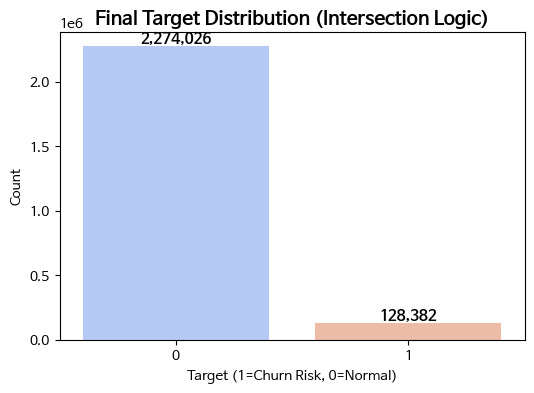

In [ ]:
# =============================================================================
# [Logic Update] 교집합 조건(AND)을 적용한 정밀 타겟 생성
# =============================================================================

# 1. 조건 정의
# (조건 A) 기울기 3종(소비, 잔액, 건수)이 모두 0 이하인 경우 (df_all_le0 개념)
cond_slopes_decrease = (
    (df['Slope_Spend'] <= 0) &
    (df['Slope_Balance'] <= 0) &
    (df['Slope_Count'] <= 0)
)

# (조건 B) 4대 위험 징후 중 2개 이상 감지된 경우
cond_high_risk = (df['Risk_Count'] >= 2)

# 2. Target 생성 (교집합 적용)
# - 두 조건(A & B)을 모두 만족해야 이탈 위험군(1)
# - 하나라도 만족하지 않으면 일반군(0)
df['Target'] = np.where(cond_slopes_decrease & cond_high_risk, 1, 0)

# -----------------------------------------------------------------------------
# [검증] 결과 확인
# -----------------------------------------------------------------------------
print("✅ 교집합(AND) 조건이 적용된 Target 생성이 완료되었습니다!")
print(f"전체 고객 수: {len(df):,}명")

# 분포 확인
target_counts = df['Target'].value_counts().sort_index()
print("\n[최종 Target 분포]")
print(f"- 이탈 위험군 (Target=1): {target_counts.get(1, 0):,}명 ({target_counts.get(1, 0)/len(df)*100:.1f}%)")
print(f"- 일반군      (Target=2): {target_counts.get(0, 0):,}명 ({target_counts.get(0, 0)/len(df)*100:.1f}%)")
print(f"  └─ (참고) 조건A(기울기감소) 만족: {cond_slopes_decrease.sum():,}명")
print(f"  └─ (참고) 조건B(Risk>=2) 만족: {cond_high_risk.sum():,}명")

# 교차 검증 (Crosstab)
print("\n[조건별 데이터 매트릭스]")
print(pd.crosstab(cond_slopes_decrease, cond_high_risk, rownames=['기울기감소(A)'], colnames=['Risk>=2(B)'], margins=True))

# 샘플 데이터 확인 (Target=1인 경우만)
print("\n[이탈 위험군(Target=1) 샘플 데이터]")
print(df[df['Target']==1][['발급회원번호', 'Slope_Spend', 'Slope_Balance', 'Slope_Count', 'Risk_Count', 'Target']].head(5))

# =============================================================================
# [시각화] 최종 Target 분포 시각화
# =============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Target', palette='coolwarm')
plt.title('Final Target Distribution (Intersection Logic)', fontsize=14, fontweight='bold')
plt.xlabel('Target (1=Churn Risk, 0=Normal)')
plt.ylabel('Count')

# 막대 위에 숫자 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.show()

In [ ]:
df['Target'].value_counts(normalize=True)

,proportion
Target,
0,0.946561
1,0.053439


In [ ]:
# # 타깃과 파생변수가 있는 데이터를 csv파일로 저장

# # ---------------------------------------------------------------------------
# # [설정] 저장하고 싶은 경로와 파일명
# # ---------------------------------------------------------------------------
# # 주의: '/content/drive/MyDrive/' 까지는 고정이고, 그 뒤가 내 폴더 경로입니다.


# # 3. CSV로 저장
# # index=False: 불필요한 인덱스 숫자(0, 1, 2...) 저장 안 함
# # encoding='utf-8-sig': 엑셀에서 한글 깨짐 방지 (필수!)
# df.to_csv(full_path, index=False, encoding='utf-8-sig')

# print(f"🎉 저장 완료! 경로를 확인하세요:\n👉 {full_path}")

# 데이터 로드 - 여기서부터 로드하고 진행하면 됩니다. 처음 드라이브 마운트만 완료하고

In [ ]:
file_name = 'General_원본_4kind2진분류_타겟파생.csv'

# # 전체 경로 만들기
full_path = os.path.join(base_path, file_name)
df = pd.read_csv(full_path)

## 원본컬럼에서 필요컬럼 추출(모델용)
- 타겟 컬럼은 리스트 형식으로 별도 로드

In [15]:
import pandas as pd
import numpy as np
import os
import glob
import gc
from joblib import Parallel, delayed
import multiprocessing

# =============================================================================
# [1] 설정 및 사용자 입력
# =============================================================================
KEY_FILE = 'general_카드회원정보.csv'

# ▼ 추출 대상 컬럼 리스트 (회원번호, 기준년월 포함) ▼
target_columns = ['발급회원번호', '기준년월' ,'Target', 'Score_BadDebt', 'Score_Delinq', 'Score_Activity', 'Score_Asset', 'Slope_Spend', 'Slope_Balance', 'Slope_Count', 'Norm_Slope_Spend', 'Norm_Slope_Balance', 'Norm_Slope_Count', '기준년월', '증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월', '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월', '증감율_이용금액_신용_전월', '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월', '증감율_이용금액_CA_전월', '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_신용_분기', '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기', '증감율_이용건수_체크_분기', '증감율_이용건수_카드론_분기', '증감율_이용금액_신용_분기', '증감율_이용금액_신판_분기', '증감율_이용금액_일시불_분기', '증감율_이용금액_할부_분기', '증감율_이용금액_CA_분기', '증감율_이용금액_체크_분기', '증감율_이용금액_카드론_분기', '잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m', '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m', '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m', '변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔', '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M', '혜택수혜율_R3M', '혜택수혜율_B0M', '최종이용일자_기본', '최종이용일자_신판', '최종이용일자_CA', '최종이용일자_카드론', '최종이용일자_체크', '최종이용일자_일시불', '최종이용일자_할부', '이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용건수_할부_B0M', '이용건수_할부_유이자_B0M', '이용건수_할부_무이자_B0M', '이용건수_CA_B0M', '이용건수_체크_B0M', '이용건수_카드론_B0M', '이용금액_신용_B0M', '이용금액_신판_B0M', '이용금액_일시불_B0M', '이용금액_할부_B0M', '이용금액_할부_유이자_B0M', '이용금액_할부_무이자_B0M', '이용금액_CA_B0M', '이용금액_체크_B0M', '이용금액_카드론_B0M', '이용후경과월_신용', '이용후경과월_신판', '이용후경과월_일시불', '이용후경과월_할부', '이용후경과월_할부_유이자', '이용후경과월_할부_무이자', '이용후경과월_부분무이자', '이용후경과월_CA', '이용후경과월_체크', '이용후경과월_카드론', '이용건수_신용_R12M', '이용건수_신판_R12M', '이용건수_일시불_R12M', '이용건수_할부_R12M', '이용건수_할부_유이자_R12M', '이용건수_할부_무이자_R12M', '이용건수_부분무이자_R12M']

# =============================================================================
# [2] 작업자 함수 정의 (메모리 최적화 포함)
# =============================================================================
def reduce_mem_usage(df):
    """ 데이터프레임 메모리 다이어트 함수 """
    if df is None: return None
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
            else:
                df[col] = df[col].astype(np.float32)
    return df

def process_file_cpu(file_path, targets, expected_len):
    """
    개별 파일을 읽어서 필요한 컬럼만 뽑아내는 함수 (Key 제외, Data Only)
    """
    file_name = os.path.basename(file_path)
    if file_name == KEY_FILE or 'General_Final' in file_name or 'Target_' in file_name:
        return None

    try:
        # 1. 헤더 읽기
        try:
            header = pd.read_csv(file_path, nrows=0, encoding='utf-8').columns.tolist()
            enc = 'utf-8'
        except:
            header = pd.read_csv(file_path, nrows=0, encoding='cp949').columns.tolist()
            enc = 'cp949'

        clean_header = [h.strip() for h in header]
        col_map = {h.strip(): h for h in header}

        # 2. 가져올 컬럼 선정 (Key 제외, 순수 데이터만)
        cols_to_load_clean = []
        for col in targets:
            if col in clean_header and col not in ['발급회원번호', '기준년월']:
                cols_to_load_clean.append(col)

        if not cols_to_load_clean:
            return None

        load_cols_original = [col_map[c] for c in cols_to_load_clean]

        # 3. 데이터 로드
        df = pd.read_csv(file_path, usecols=load_cols_original, encoding=enc)

        # 4. 행 개수 검증
        if len(df) != expected_len:
            print(f"    🚨 [Skip] {file_name}: 행 개수 불일치 ({len(df)} vs {expected_len})")
            return None

        # 5. 전처리 (공백 제거 & 메모리 최적화)
        df.columns = df.columns.str.strip()
        df = reduce_mem_usage(df)

        return df

    except Exception as e:
        print(f"    ❌ [Error] {file_name}: {e}")
        return None

# =============================================================================
# [3] 메인 실행 로직
# =============================================================================
print("=== 🚀 [Multi-CPU] 전체 이력 데이터 추출기 (Concat Mode) ===")

# 1. 기준 뼈대(Key) 생성
print(f"  > 뼈대 파일 로드 중 ({KEY_FILE})...")
try:
    df_main = pd.read_csv(os.path.join(base_path, KEY_FILE), usecols=['발급회원번호', '기준년월'], encoding='utf-8')
except:
    df_main = pd.read_csv(os.path.join(base_path, KEY_FILE), usecols=['발급회원번호', '기준년월'], encoding='cp949')

# 기준년월 통일
df_main['기준년월'] = pd.to_numeric(df_main['기준년월'], errors='coerce')
df_main = reduce_mem_usage(df_main)
main_len = len(df_main)

print(f"    - 기준 데이터 확보: {main_len:,}행 (회원번호+기준년월 포함)")

# 2. 병렬 처리 실행
csv_files = glob.glob(os.path.join(base_path, "*.csv"))
num_cores = multiprocessing.cpu_count()
print(f"  > CPU 코어 {num_cores}개 사용하여 데이터 추출 시작...")

results = Parallel(n_jobs=-1, verbose=5)(
    delayed(process_file_cpu)(f, target_columns, main_len) for f in csv_files
)

# =============================================================================
# [4] 데이터 조립 (Assembly)
# =============================================================================
print("\n=== 🧩 데이터 합치기 (Concat) ===")

# 첫 번째는 뼈대 데이터
dfs_to_concat = [df_main]
seen_columns = set(df_main.columns)

for res_df in results:
    if res_df is None:
        continue

    # 중복 컬럼 방지 (이미 뼈대에 있거나 앞선 파일에 있는 컬럼은 제외)
    new_cols = [c for c in res_df.columns if c not in seen_columns]

    if new_cols:
        dfs_to_concat.append(res_df[new_cols])
        # 컬럼 등록
        for c in new_cols:
            seen_columns.add(c)

# 메모리 정리
del results, df_main
gc.collect()

# 옆으로 붙이기 (Concat)
# 모든 파일의 순서가 동일하다는 전제하에 axis=1로 붙입니다.
df_final = pd.concat(dfs_to_concat, axis=1)

# 메모리 정리
del dfs_to_concat
gc.collect()

# =============================================================================
# [5] 결과 확인 (필터링 없음)
# =============================================================================
print("\n🎉 [성공] 전체 이력 데이터셋 생성 완료!")
print(f"👉 최종 크기: {df_final.shape}")
print(f"👉 컬럼 목록: {df_final.columns.tolist()}")

# 참고: 정렬은 원본 순서(아마도 회원별 날짜순)를 따릅니다.
# 필요하다면 아래 코드로 정렬만 다시 할 수 있습니다.
# df_final = df_final.sort_values(by=['발급회원번호', '기준년월'])

=== 🚀 [Multi-CPU] 전체 이력 데이터 추출기 (Concat Mode) ===
  > 뼈대 파일 로드 중 (general_카드회원정보.csv)...
    - 기준 데이터 확보: 14,414,448행 (회원번호+기준년월 포함)
  > CPU 코어 12개 사용하여 데이터 추출 시작...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.7s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  1.9min remaining:   28.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.1min finished



=== 🧩 데이터 합치기 (Concat) ===

🎉 [성공] 전체 이력 데이터셋 생성 완료!
👉 최종 크기: (14414448, 91)
👉 컬럼 목록: ['기준년월', '발급회원번호', '증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월', '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월', '증감율_이용금액_신용_전월', '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월', '증감율_이용금액_CA_전월', '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_신용_분기', '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기', '증감율_이용건수_체크_분기', '증감율_이용건수_카드론_분기', '증감율_이용금액_신용_분기', '증감율_이용금액_신판_분기', '증감율_이용금액_일시불_분기', '증감율_이용금액_할부_분기', '증감율_이용금액_CA_분기', '증감율_이용금액_체크_분기', '증감율_이용금액_카드론_분기', '잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m', '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m', '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m', '변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔', '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M', '혜택수혜율_R3M', '혜택수혜율_B0M', '최종이용일자_기본', '최종이용일자_신판', '최종이용일자_CA', '최종이용일자_카드론', '최종이용일자

In [16]:
df_final['발급회원번호'].value_counts()

,count
발급회원번호,
SYN_2999999,6
SYN_1,6
SYN_2,6
SYN_3,6
SYN_4,6
...,...
SYN_14,6
SYN_15,6
SYN_16,6


In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14414448 entries, 0 to 14414447
Data columns (total 91 columns):
 #   Column              Dtype  
---  ------              -----  
 0   기준년월                int32  
 1   발급회원번호              object 
 2   증감율_이용건수_신용_전월      float32
 3   증감율_이용건수_신판_전월      float32
 4   증감율_이용건수_일시불_전월     float32
 5   증감율_이용건수_할부_전월      float32
 6   증감율_이용건수_CA_전월      float32
 7   증감율_이용건수_체크_전월      float32
 8   증감율_이용건수_카드론_전월     float32
 9   증감율_이용금액_신용_전월      float32
 10  증감율_이용금액_신판_전월      float32
 11  증감율_이용금액_일시불_전월     float32
 12  증감율_이용금액_할부_전월      float32
 13  증감율_이용금액_CA_전월      float32
 14  증감율_이용금액_체크_전월      float32
 15  증감율_이용금액_카드론_전월     float32
 16  증감율_이용건수_신용_분기      float32
 17  증감율_이용건수_신판_분기      float32
 18  증감율_이용건수_일시불_분기     float32
 19  증감율_이용건수_할부_분기      float32
 20  증감율_이용건수_CA_분기      float32
 21  증감율_이용건수_체크_분기      float32
 22  증감율_이용건수_카드론_분기     float32
 23  증감율_이용금액_신용_분기      float32
 24  증감율_이용금액_신판_분기      fl

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2402408 entries, 0 to 2402407
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   발급회원번호               object 
 1   Slope_Spend          float64
 2   Slope_Count          float64
 3   Slope_Balance        float64
 4   Score_BadDebt        float64
 5   Score_Delinq         float64
 6   Score_Activity       float64
 7   Score_Asset          float64
 8   Score_Status_Total   float64
 9   Norm_Slope_Spend     float64
 10  Norm_Slope_Balance   float64
 11  Norm_Slope_Count     float64
 12  Score_Slope_Total    float64
 13  Final_Total_Score    float64
 14  Cond1_Has_BadDebt    bool   
 15  Cond2_Has_Delinq     bool   
 16  Cond3_Activity_Drop  bool   
 17  Cond4_Asset_Zero     bool   
 18  Churn_Segment        object 
 19  Risk_Count           int64  
 20  Target               int64  
dtypes: bool(4), float64(13), int64(2), object(2)
memory usage: 320.8+ MB


### 원본(선택된 컬럼) 과 타겟컬럼 머지

In [19]:
import gc

key_cols = ['발급회원번호']
# 1. 병합 수행 (copy=False 옵션: 불필요한 메모리 복사 방지)
df_2 = pd.merge(df, df_final, on=key_cols, how='inner', copy=False)

del df, df_final
gc.collect() # (RAM 반환)

print("✅ 병합 및 메모리 정리 완료")

✅ 병합 및 메모리 정리 완료


In [20]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14414448 entries, 0 to 14414447
Columns: 111 entries, 발급회원번호 to 이용건수_부분무이자_R12M
dtypes: bool(4), float32(47), float64(13), int16(3), int32(17), int64(2), int8(23), object(2)
memory usage: 5.7+ GB


In [22]:
df_2['Target'].value_counts()

,count
Target,
0,13644156
1,770292


In [23]:
# # df_2 csv 형태로 저장
# file_name = '원본_4kind2진분류_모델학습용.csv'
# full_path = os.path.join(base_path, file_name)

# df_2.to_csv(full_path, index=False, encoding='utf-8-sig')

In [24]:
# import gc
# import os
# import glob
# import sys

# def deep_clean_system():
#     print("=== 🧹 시스템 대청소 시작 ===")

#     # -------------------------------------------------------------------------
#     # 1. [RAM] 거대 변수 삭제 (globals() 확인)
#     # -------------------------------------------------------------------------
#     # 우리가 작업하며 만들었을 법한 큰 변수 이름들
#     target_vars = [
#         'df', 'df_final', 'df_numeric',               # 데이터프레임 원본들(df_2 제외)
#         'X', 'X_reduced', 'y',                        # 모델링 데이터
#         'result', 'churn_scores',                     # 결과물
#         'df_keys', 'extracted_dfs', 'dfs_to_merge',   # 중간 리스트
#         'lgbm_model', 'selector'                      # 모델 객체
#     ]

#     deleted_count = 0
#     # 현재 메모리에 있는 전역 변수들 중 target_vars에 해당하면 삭제
#     # (주의: globals()를 직접 순회하며 삭제하면 에러 날 수 있으므로 리스트 복사 사용)
#     for var_name in list(globals().keys()):
#         if var_name in target_vars:
#             try:
#                 del globals()[var_name]
#                 deleted_count += 1
#                 print(f"   🗑️ [RAM] 변수 삭제됨: '{var_name}'")
#             except:
#                 pass

#     if deleted_count == 0:
#         print("   ✨ [RAM] 삭제할 거대 변수가 없습니다. (이미 깨끗함)")

#     # -------------------------------------------------------------------------
#     # 2. [RAM] 가비지 컬렉터 (Garbage Collector) 강제 구동
#     # -------------------------------------------------------------------------
#     # gc.collect()는 순환 참조된 객체들을 찾아 메모리를 반환합니다.
#     collected = gc.collect()
#     print(f"   ♻️ [GC] 가비지 컬렉터 실행 완료: {collected}개 객체 반환")

#     print("\n=== ✅ 청소 완료! 메모리가 확보되었습니다. ===")

# # 함수 실행
# deep_clean_system()

## 모델 학습(LightGBM)
- 타겟
  - 30만데이터로 lightGBM 의 feature importance 를 통해
  선정된 컬럼들

In [ ]:
# 전에 만들어놨던 데이터 로드 or df_2


==================== [GENERAL] Training Start (Balanced) ====================
 - 학습 Feature 수: 82개
 - 학습 데이터 샘플 수: 14414448개
✅ 학습 완료 (소요시간: 174.12초)

📊 [GENERAL] Model Performance Report
 - Accuracy  : 0.7511
 - F1 Score  : 0.8191
 - ROC-AUC   : 0.8885
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.74      0.85   2728832
           1       0.16      0.89      0.28    154058

    accuracy                           0.75   2882890
   macro avg       0.58      0.82      0.56   2882890
weighted avg       0.95      0.75      0.82   2882890



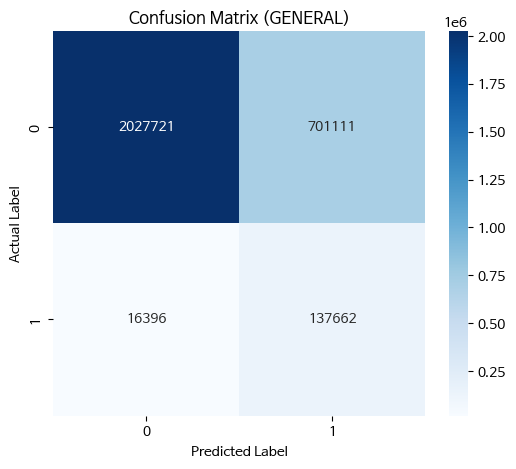

<Figure size 1000x800 with 0 Axes>

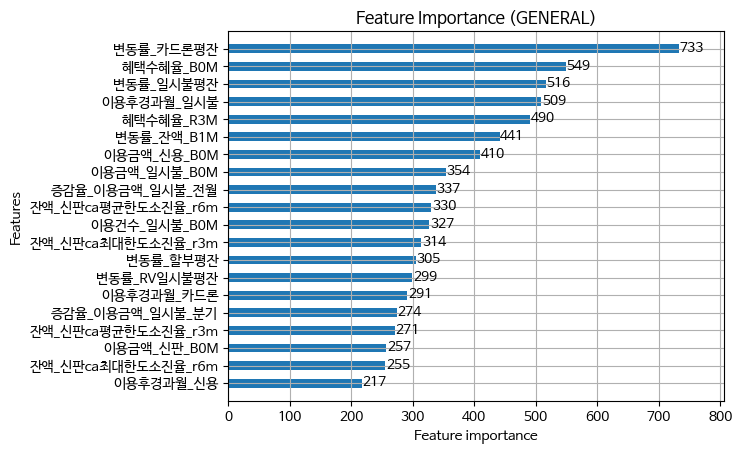

In [30]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# =============================================================================
# [Step 7] LightGBM 모델 학습 (General Only)
# =============================================================================

def train_eval_lgbm_general(input_data, group_name='GENERAL', device_type='cpu'):
    print(f"\n{'='*20} [{group_name}] Training Start (Balanced) {'='*20}")

    # 1. 데이터 준비
    if input_data is None:
        print("❌ 입력 데이터가 없습니다 (None). 앞 단계의 추출 결과를 확인해주세요.")
        return None, None

    df_train = input_data.copy()

    # 2. Leakage 변수 제거 (타겟 유출 방지)
    # Target과 발급회원번호는 학습에 직접 쓰지 않으므로 분리
    leakage_cols = [
      'Target', '발급회원번호', 'Unnamed: 0', '기준년월',
      '최종이용일자_카드론', '최종이용일자_할부', '최종이용일자_CA',
      '최종이용일자_체크', '최종이용일자_기본', '최종이용일자_일시불', '최종이용일자_신판',
      'Slope_Spend', 'Slope_Balance', 'Slope_Count',
      'Norm_Slope_Spend', 'Norm_Slope_Balance', 'Norm_Slope_Count',
      'Score_BadDebt', 'Score_Delinq', 'Score_Activity', 'Score_Asset',
      'Score_Status_Total', 'Score_Slope_Total', 'Final_Total_Score',
      'Risk_Count', 'Churn_Segment',
      'Cond1_Has_BadDebt', 'Cond2_Has_Delinq', 'Cond3_Activity_Drop', 'Cond4_Asset_Zero'
  ]

    # 실제 학습에 사용할 Feature(X)와 Target(y) 분리
    # Target은 반드시 존재해야 함
    if 'Target' not in df_train.columns:
        print("❌ 'Target' 컬럼이 없습니다.")
        return None, None

    y = df_train['Target']

    # Leakage 컬럼 제외 및 수치형 데이터만 선택
    cols_to_drop = [c for c in leakage_cols if c in df_train.columns]
    X = df_train.drop(columns=cols_to_drop)
    X = X.select_dtypes(include=['number'])

    print(f" - 학습 Feature 수: {X.shape[1]}개")
    print(f" - 학습 데이터 샘플 수: {X.shape[0]}개")

    # 3. Train / Test Split
    # stratify=y를 통해 이탈/비이탈 비율을 유지하며 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 4. LightGBM 파라미터 설정
    params = {
        'n_estimators': 400,
        'learning_rate': 0.05,
        'num_leaves': 31,
        'max_depth': -1,
        'random_state': 42,
        'n_jobs': -1,
        'device': device_type,
        'verbose': -1,
        'class_weight': 'balanced' # [핵심] 불균형 데이터 자동 보정
    }

    # GPU 설정 (필요시 활성화)
    if device_type == 'gpu':
        params['gpu_platform_id'] = 0
        params['gpu_device_id'] = 0

    model = lgb.LGBMClassifier(**params)

    # 5. 모델 학습
    start_time = time.time()
    try:
        model.fit(X_train, y_train)
    except Exception as e:
        print(f"⚠️ 학습 중 에러 발생 ({e}). CPU 모드로 전환하여 재시도합니다.")
        params['device'] = 'cpu'
        if 'gpu_platform_id' in params: del params['gpu_platform_id']
        if 'gpu_device_id' in params: del params['gpu_device_id']

        model = lgb.LGBMClassifier(**params)
        model.fit(X_train, y_train)

    elapsed = time.time() - start_time
    print(f"✅ 학습 완료 (소요시간: {elapsed:.2f}초)")

    # 6. 성능 평가
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted') # 다중 클래스일 경우 weighted 권장 (2진분류도 호환)
    # AUC는 2진 분류일 때만 계산 (Target 1, 2인 경우 0, 1로 매핑 필요할 수 있음)
    try:
        # Target이 1, 2로 되어있다면 2를 0으로 인식하게 하거나 pos_label 지정 필요
        # 여기서는 모델이 알아서 클래스를 인식하므로 그대로 진행 시도
        auc = roc_auc_score(y_test, y_prob)
    except:
        auc = 0.0 # 에러 시 0 처리

    print(f"\n📊 [{group_name}] Model Performance Report")
    print(f" - Accuracy  : {acc:.4f}")
    print(f" - F1 Score  : {f1:.4f}")
    print(f" - ROC-AUC   : {auc:.4f}")
    print("-" * 50)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix 시각화
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({group_name})')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Feature Importance 시각화 (Top 20)
    plt.figure(figsize=(10, 8))
    lgb.plot_importance(model, max_num_features=20, height=0.5, title=f'Feature Importance ({group_name})')
    plt.show()

    return model, (acc, f1, auc)

# =============================================================================
# [실행] General 모델 학습
# =============================================================================

# df_2: 앞선 [Step 6]에서 Top 100 Feature로 추출된 데이터프레임
if 'df_2' in locals() and df_2 is not None:
    model_gen, res_gen = train_eval_lgbm_general(
        input_data=df_2,
        group_name='GENERAL',
        device_type='cpu' # GPU 사용 시 'gpu'로 변경
    )
else:
    print("⛔ 'df_2' 데이터가 준비되지 않았습니다. 앞선 코드를 먼저 실행해주세요.")

In [27]:
import gc

def clean_after_training():
    print("=== 🧹 학습 후 메모리 대청소 시작 ===")

    # 1. 삭제할 거대 변수 목록 (학습이 끝났으니 원본 데이터는 필요 없음)
    # model_gen, res_gen은 결과물이므로 절대 지우면 안 됩니다!
    target_vars = [
        'df_train',    # 학습 원본 데이터
        'X', 'y', 'X_train', 'X_test',       # (혹시 전역 변수로 남아있다면)
        'y_train', 'y_test',
        'leakage_cols', 'cols_to_drop'       # 기타 리스트
    ]

    deleted_count = 0

    # globals()에 있는 전역 변수 확인 및 삭제
    for var in target_vars:
        if var in globals():
            try:
                del globals()[var]
                deleted_count += 1
                print(f"   🗑️ [삭제] 변수 제거됨: '{var}'")
            except Exception as e:
                print(f"   ⚠️ 삭제 실패 ('{var}'): {e}")

    # 2. 가비지 컬렉터 강제 실행 (RAM 반환)
    gc.collect()

    if deleted_count == 0:
        print("   ✨ 삭제할 데이터 변수가 없습니다. (이미 깨끗함)")
    else:
        print(f"   ✨ 총 {deleted_count}개의 거대 변수를 삭제하고 메모리를 확보했습니다.")

    print("\n✅ [현재 생존한 중요 변수]")
    if 'model_gen' in globals(): print("   - 🧠 model_gen (학습된 모델)")
    if 'res_gen' in globals(): print("   - 📊 res_gen (성능 평가 결과)")

# 함수 실행
clean_after_training()

=== 🧹 학습 후 메모리 대청소 시작 ===
   ✨ 삭제할 데이터 변수가 없습니다. (이미 깨끗함)

✅ [현재 생존한 중요 변수]
   - 🧠 model_gen (학습된 모델)
   - 📊 res_gen (성능 평가 결과)


In [ ]:
gc.collect()

0

## 파라미터 수정된 모델(by optuna)


==================== [GENERAL] Training Start (Balanced) ====================
 - 학습 Feature 수: 90개
 - 학습 데이터 샘플 수: 14414448개
✅ 학습 완료 (소요시간: 234.47초)

📊 [GENERAL] Model Performance Report
 - Accuracy  : 0.8878
 - F1 Score  : 0.9087
 - ROC-AUC   : 0.9041
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.90      0.94   2728832
           1       0.27      0.66      0.39    154058

    accuracy                           0.89   2882890
   macro avg       0.63      0.78      0.66   2882890
weighted avg       0.94      0.89      0.91   2882890



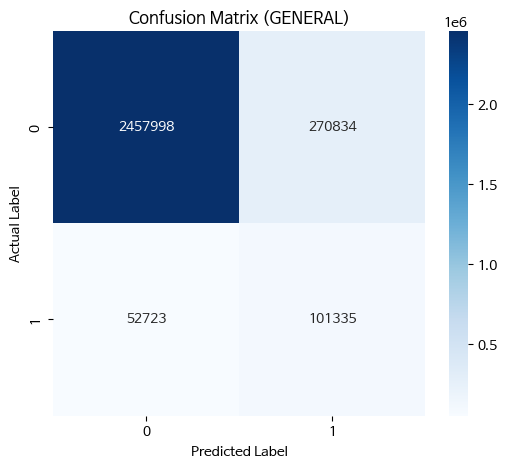

<Figure size 1000x800 with 0 Axes>

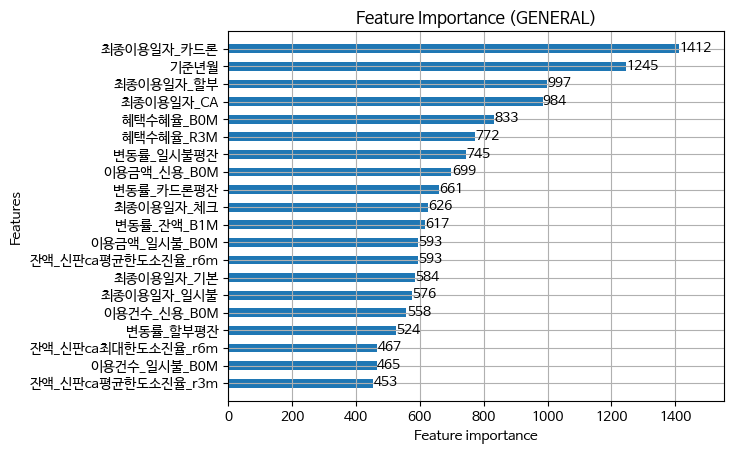

In [28]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# =============================================================================
# [Step 7] LightGBM 모델 학습 (General Only)
# =============================================================================

def train_eval_lgbm_general(input_data, group_name='GENERAL', device_type='cpu'):
    print(f"\n{'='*20} [{group_name}] Training Start (Balanced) {'='*20}")

    # 1. 데이터 준비
    if input_data is None:
        print("❌ 입력 데이터가 없습니다 (None). 앞 단계의 추출 결과를 확인해주세요.")
        return None, None

    df_train = input_data.copy()

    # 2. Leakage 변수 제거 (타겟 유출 방지)
    # Target과 발급회원번호는 학습에 직접 쓰지 않으므로 분리
    leakage_cols = [
        'Target', '발급회원번호', 'Unnamed: 0',
        # 아래 변수들은 Feature Importance 단계에서 이미 걸러졌을 수 있으나 안전장치로 포함
        'Slope_Spend', 'Slope_Balance', 'Slope_Count',
        'Norm_Slope_Spend', 'Norm_Slope_Balance', 'Norm_Slope_Count',
        'Score_BadDebt', 'Score_Delinq', 'Score_Activity', 'Score_Asset',
        'Score_Status_Total', 'Score_Slope_Total', 'Final_Total_Score',
        'Risk_Count', 'Churn_Segment',
        'Cond1_Has_BadDebt', 'Cond2_Has_Delinq', 'Cond3_Activity_Drop', 'Cond4_Asset_Zero'
    ]

    # 실제 학습에 사용할 Feature(X)와 Target(y) 분리
    # Target은 반드시 존재해야 함
    if 'Target' not in df_train.columns:
        print("❌ 'Target' 컬럼이 없습니다.")
        return None, None

    y = df_train['Target']

    # Leakage 컬럼 제외 및 수치형 데이터만 선택
    cols_to_drop = [c for c in leakage_cols if c in df_train.columns]
    X = df_train.drop(columns=cols_to_drop)
    X = X.select_dtypes(include=['number'])

    print(f" - 학습 Feature 수: {X.shape[1]}개")
    print(f" - 학습 데이터 샘플 수: {X.shape[0]}개")

    # 3. Train / Test Split
    # stratify=y를 통해 이탈/비이탈 비율을 유지하며 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 4. LightGBM 파라미터 설정
    params = {
        'n_estimators': 481,
        'learning_rate': 0.07,
        'num_leaves': 53,
        'max_depth': 12,
        'min_child_samples': 61,
        'reg_alpha' : 2.78,
        'reg_lambda' : 1.27,
        'scale_pos_weight' : 5.78
    }

    # GPU 설정 (필요시 활성화)
    if device_type == 'gpu':
        params['gpu_platform_id'] = 0
        params['gpu_device_id'] = 0

    model = lgb.LGBMClassifier(**params)

    # 5. 모델 학습
    start_time = time.time()
    try:
        model.fit(X_train, y_train)
    except Exception as e:
        print(f"⚠️ 학습 중 에러 발생 ({e}). CPU 모드로 전환하여 재시도합니다.")
        params['device'] = 'cpu'
        if 'gpu_platform_id' in params: del params['gpu_platform_id']
        if 'gpu_device_id' in params: del params['gpu_device_id']

        model = lgb.LGBMClassifier(**params)
        model.fit(X_train, y_train)

    elapsed = time.time() - start_time
    print(f"✅ 학습 완료 (소요시간: {elapsed:.2f}초)")

    # 6. 성능 평가
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted') # 다중 클래스일 경우 weighted 권장 (2진분류도 호환)
    # AUC는 2진 분류일 때만 계산 (Target 1, 2인 경우 0, 1로 매핑 필요할 수 있음)
    try:
        # Target이 1, 2로 되어있다면 2를 0으로 인식하게 하거나 pos_label 지정 필요
        # 여기서는 모델이 알아서 클래스를 인식하므로 그대로 진행 시도
        auc = roc_auc_score(y_test, y_prob)
    except:
        auc = 0.0 # 에러 시 0 처리

    print(f"\n📊 [{group_name}] Model Performance Report")
    print(f" - Accuracy  : {acc:.4f}")
    print(f" - F1 Score  : {f1:.4f}")
    print(f" - ROC-AUC   : {auc:.4f}")
    print("-" * 50)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix 시각화
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({group_name})')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Feature Importance 시각화 (Top 20)
    plt.figure(figsize=(10, 8))
    lgb.plot_importance(model, max_num_features=20, height=0.5, title=f'Feature Importance ({group_name})')
    plt.show()

    return model, (acc, f1, auc)

# =============================================================================
# [실행] General 모델 학습
# =============================================================================

# df_2: 앞선 [Step 6]에서 Top 100 Feature로 추출된 데이터프레임
if 'df_2' in locals() and df_2 is not None:
    model_gen, res_gen = train_eval_lgbm_general(
        input_data=df_2,
        group_name='GENERAL',
        device_type='cpu' # GPU 사용 시 'gpu'로 변경
    )
else:
    print("⛔ 'df_2' 데이터가 준비되지 않았습니다. 앞선 코드를 먼저 실행해주세요.")